# Business Opportunities for the Edinburgh Tram Extension

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

# 1. Data Collection

## 1.1 Current & Future Tram Stops with Postcodes

In [303]:
# There are eight current tram stops within the central city area defined by the following dataframe
currentTramStops_df=pd.DataFrame({'TramStop':['Saughton', 'Balgreen','Murrayfield Stadium', 'Haymarket',\
                                       'West End','Princes Street', 'St Andrews Square', 'York Place'],\
                                  'Postcode':['EH11 3NE', 'EH12 5XQ', 'EH12 5PL', 'EH12 5JZ',\
                                              'EH3 8ET', 'EH2 2ER', 'EH2 2AD', 'EH1 3JD'],\
                                  'Status':['Current','Current','Current','Current',\
                                           'Current','Current','Current','Current']})
currentTramStops_df

,TramStop,Postcode,Status
0,Saughton,EH11 3NE,Current
1,Balgreen,EH12 5XQ,Current
2,Murrayfield Stadium,EH12 5PL,Current
3,Haymarket,EH12 5JZ,Current
4,West End,EH3 8ET,Current
5,Princes Street,EH2 2ER,Current
6,St Andrews Square,EH2 2AD,Current
7,York Place,EH1 3JD,Current


In [116]:
# There are eight planned tram stops on the extension defined by the following dataframe
futureTramStops_df=pd.DataFrame({'TramStop':['Picardy Place', 'McDonald Road','Balfour Street','Foot of the Walk',\
                                             'The Shore','Port of Leith','Ocean Terminal','Newhaven'], \
                                 'Postcode':['EH1 3JT', 'EH7 4LX','EH6 5EP','EH6 7AB',\
                                             'EH6 6QN', 'EH6 6JD','EH6 6JJ', 'EH6 4JJ'],\
                                 'Status':['Future','Future','Future','Future',\
                                           'Future','Future','Future','Future']})
futureTramStops_df

,TramStop,Postcode,Status
0,Picardy Place,EH1 3JT,Future
1,McDonald Road,EH7 4LX,Future
2,Balfour Street,EH6 5EP,Future
3,Foot of the Walk,EH6 7AB,Future
4,The Shore,EH6 6QN,Future
5,Port of Leith,EH6 6JD,Future
6,Ocean Terminal,EH6 6JJ,Future
7,Newhaven,EH6 4JJ,Future


In [117]:
# join current and future dataframes
allTramStops_df = pd.concat([currentTramStops_df, futureTramStops_df])
allTramStops_df=allTramStops_df.reset_index(drop=True)
allTramStops_df

,TramStop,Postcode,Status
0,Saughton,EH11 3NE,Current
1,Balgreen,EH12 5XQ,Current
2,Murrayfield Stadium,EH12 5PL,Current
3,Haymarket,EH12 5JZ,Current
4,West End,EH3 8ET,Current
5,Princes Street,EH2 2ER,Current
6,St Andrews Square,EH2 2AD,Current
7,York Place,EH1 3JD,Current
8,Picardy Place,EH1 3JT,Future
9,McDonald Road,EH7 4LX,Future


## 1.2 Import and Merge Local Stats (from Scottish Government Website

In [147]:
# There is an Excel file whch lists all Edinburgh postcodes and Local Statistics 
# at https://www2.gov.scot/Topics/Statistics/SIMD/PostcodeLookupEdinburghCi
sGovPcStats_df =  pd.read_excel('https://www2.gov.scot/Resource/0041/00412531.xls', \
                                sheet_name='Sheet1', index_col='Postcode')
pcStats_df = sGovPcStats_df.drop(['DataZone','SIMD 2012 quintile','SIMD 2012 decile',\
                                 'SIMD 2012 vigintile','SIMD 2009 rank','SIMD 2009 quintile',\
                                 'SIMD 2009 decile','SIMD 2009 vigintile','Datazone Population (2010)',\
                                 'CHP Population Weighted Vigintile 2012','HB Population Weighted Vigintile 2012',\
                                 'Scotland Population Weighted Vigintile 2012','IntZone','LACode','LA_Name',\
                                 'CHP_Code','CHP_Name','HB_Code','HB_Name','UR6_Code','UR6_Desc','SplitInd'],axis=1) 
pcStats_df.rename(columns={'SIMD 2012 rank':'Deprivation','IntZone_Name':'intZoneName'},inplace=True)
pcStats_df.head()                                          


,Deprivation,intZoneName
Postcode,,
EH1 1AD,3880,Old Town and Leith Street
EH1 1BB,2964,Old Town and Leith Street
EH1 1BD,2964,Old Town and Leith Street
EH1 1BE,2964,Old Town and Leith Street
EH1 1BJ,2964,Old Town and Leith Street


In [119]:
#create merge of tram stops and local stats
allTramStopsStats_df=allTramStops_df.merge(pcStats_df, on='Postcode', how = 'left')
allTramStopsStats_df

,TramStop,Postcode,Status,Deprivation,intZoneName
0,Saughton,EH11 3NE,Current,973,Stenhouse
1,Balgreen,EH12 5XQ,Current,4962,Balgreen and Roseburn
2,Murrayfield Stadium,EH12 5PL,Current,5150,Balgreen and Roseburn
3,Haymarket,EH12 5JZ,Current,5897,"Dean, West End and West Coates"
4,West End,EH3 8ET,Current,4593,Tollcross
5,Princes Street,EH2 2ER,Current,2964,Old Town and Leith Street
6,St Andrews Square,EH2 2AD,Current,2964,Old Town and Leith Street
7,York Place,EH1 3JD,Current,3197,Old Town and Leith Street
8,Picardy Place,EH1 3JT,Future,3197,Old Town and Leith Street
9,McDonald Road,EH7 4LX,Future,5499,Broughton


## Import and Merge Council Tax Bands (City of Edinburgh Open Data)

In [120]:
# This is imported from City of Edinburgh Open Data at https://data.edinburghopendata.info
councilTax_df =  pd.read_csv('https://data.edinburghopendata.info/dataset/3794ec1e-672d-40eb-8af6-59c7b0e431e3/resource/5cf39178-5297-4a9d-beed-91db092d96a6/download/counciltaxbandsbypostcode.csv')
councilTax_df.rename(columns={'Post Code':'Postcode','Current Chargeable band':'Council Tax Band'},inplace=True)
councilTax_df.head()


,Postcode,Council Tax Band
0,EH10 4AA,B
1,EH10 4AD,D
2,EH10 4AD,E
3,EH10 4AE,D
4,EH10 4AF,D


In [121]:
#create merge of tram stops and council tax band 
allTramsStopsStatsBand_df=allTramStopsStats_df.merge(councilTax_df, on='Postcode', how = 'left')
allTramsStopsStatsBand_df.fillna("X", inplace = True)
allTramsStopsStatsBand_df.head()

,TramStop,Postcode,Status,Deprivation,intZoneName,Council Tax Band
0,Saughton,EH11 3NE,Current,973,Stenhouse,A
1,Balgreen,EH12 5XQ,Current,4962,Balgreen and Roseburn,E
2,Murrayfield Stadium,EH12 5PL,Current,5150,Balgreen and Roseburn,D
3,Murrayfield Stadium,EH12 5PL,Current,5150,Balgreen and Roseburn,E
4,Murrayfield Stadium,EH12 5PL,Current,5150,Balgreen and Roseburn,F


## 1.4 Scrape & Merge Council Tax Charge

In [212]:
# Council Tax Levels (from: https://littlejohns.ltd.uk/council-tax-information/)
url='https://littlejohns.ltd.uk/council-tax-information'
annualCouncilTax_df=pd.read_html(url, header=0)[0]
annualCouncilTax_df.rename(columns={'Band':'Council Tax Band'},inplace=True)
annualCouncilTax_df.rename(columns={'Annual Council Tax':'Council Tax'},inplace=True)
annualCouncilTax_df['Council Tax']=annualCouncilTax_df['Council Tax'].str.replace('£', '').astype(float)
annualCouncilTax_df = annualCouncilTax_df.drop(['Per Month*'],axis=1) 
annualCouncilTax_df = annualCouncilTax_df.append({"Council Tax Band":"X","Council Tax":0} , ignore_index=True)
annualCouncilTax_df

,Council Tax Band,Council Tax
0,A,1147.76
1,B,1339.05
2,C,1530.35
3,D,1721.64
4,E,2221.32
5,F,2717.46
6,G,3241.98
7,H,4018.11
8,X,0.00


In [213]:
#create merge of tram stops and local stats
allTramStopsStatsTax_df=allTramsStopsStatsBand_df.merge(annualCouncilTax_df, on='Council Tax Band', how = 'left')
allTramStopsStatsTax_df=allTramStopsStatsTax_df.reset_index(drop=True)
allTramStopsStatsTax_df.head()


,TramStop,Postcode,Status,Deprivation,intZoneName,Council Tax Band,Council Tax
0,Saughton,EH11 3NE,Current,973,Stenhouse,A,1147.76
1,Balgreen,EH12 5XQ,Current,4962,Balgreen and Roseburn,E,2221.32
2,Murrayfield Stadium,EH12 5PL,Current,5150,Balgreen and Roseburn,D,1721.64
3,Murrayfield Stadium,EH12 5PL,Current,5150,Balgreen and Roseburn,E,2221.32
4,Murrayfield Stadium,EH12 5PL,Current,5150,Balgreen and Roseburn,F,2717.46


In [214]:
averageTax_df = allTramStopsStatsTax_df.groupby(['TramStop']).mean().apply(lambda x:round(x,2))
averageTax_df

,Deprivation,Council Tax
TramStop,,
Balfour Street,3261,1434.70
Balgreen,4962,2221.32
Foot of the Walk,786,1339.05
Haymarket,5897,1824.44
McDonald Road,5499,1703.09
Murrayfield Stadium,5150,2669.63
Newhaven,2218,1530.35
Ocean Terminal,2772,2726.92
Picardy Place,3197,1569.38


In [217]:
# merge average Council Tax and main dataframe
allTramStopsStatsTax_df1 = allTramStopsStatsTax_df.drop(['Deprivation'],axis=1) 
allTramStopsStatsTax_df2 = allTramStopsStatsTax_df1.drop(['Council Tax'],axis=1) 
allTramStopsStatsMeanTax_df = allTramStopsStatsTax_df2.merge(averageTax_df, on='TramStop', how = 'left')
allTramStopsStatsMeanTax_df2 = allTramStopsStatsMeanTax_df.drop(['Council Tax Band'],axis=1) 
allTramStopsStatsMeanTax_df2.rename(columns={'deprivationIndex':'Deprivation'},inplace=True)
allTramStopsStatsMeanTax_df2 = allTramStopsStatsMeanTax_df2.drop_duplicates(keep = 'first')
allTramStopsStatsMeanTax_df2.reset_index(drop=True)

,TramStop,Postcode,Status,intZoneName,Deprivation,Council Tax
0,Saughton,EH11 3NE,Current,Stenhouse,973,1147.76
1,Balgreen,EH12 5XQ,Current,Balgreen and Roseburn,4962,2221.32
2,Murrayfield Stadium,EH12 5PL,Current,Balgreen and Roseburn,5150,2669.63
3,Haymarket,EH12 5JZ,Current,"Dean, West End and West Coates",5897,1824.44
4,West End,EH3 8ET,Current,Tollcross,4593,2286.55
5,Princes Street,EH2 2ER,Current,Old Town and Leith Street,2964,3325.85
6,St Andrews Square,EH2 2AD,Current,Old Town and Leith Street,2964,0.00
7,York Place,EH1 3JD,Current,Old Town and Leith Street,3197,3049.72
8,Picardy Place,EH1 3JT,Future,Old Town and Leith Street,3197,1569.38
9,McDonald Road,EH7 4LX,Future,Broughton,5499,1703.09


In [218]:
# create function for adding the string ' UK' to a postcode to enable geomapping of postcode to Lat Long
def add_UK (pc):
    pcuk = pc + ', UK'
    return pcuk
test = 'EH11 3NE'
pcuk1 = add_UK (test)
print ('The function add_UK has been created and converts, for example,', test, 'to:', pcuk1)

The function add_UK has been created and converts, for example, EH11 3NE to: EH11 3NE, UK


In [219]:
allTramStopsStatsMeanTax_df3 = allTramStopsStatsMeanTax_df2
allTramStopsStatsMeanTax_df3['PostcodeUK']=add_UK(allTramStopsStatsMeanTax_df3['Postcode'])
allTramStopsStatsMeanTax_df3

,TramStop,Postcode,Status,intZoneName,Deprivation,Council Tax,PostcodeUK
0,Saughton,EH11 3NE,Current,Stenhouse,973,1147.76,"EH11 3NE, UK"
1,Balgreen,EH12 5XQ,Current,Balgreen and Roseburn,4962,2221.32,"EH12 5XQ, UK"
2,Murrayfield Stadium,EH12 5PL,Current,Balgreen and Roseburn,5150,2669.63,"EH12 5PL, UK"
6,Haymarket,EH12 5JZ,Current,"Dean, West End and West Coates",5897,1824.44,"EH12 5JZ, UK"
9,West End,EH3 8ET,Current,Tollcross,4593,2286.55,"EH3 8ET, UK"
14,Princes Street,EH2 2ER,Current,Old Town and Leith Street,2964,3325.85,"EH2 2ER, UK"
17,St Andrews Square,EH2 2AD,Current,Old Town and Leith Street,2964,0.00,"EH2 2AD, UK"
18,York Place,EH1 3JD,Current,Old Town and Leith Street,3197,3049.72,"EH1 3JD, UK"
22,Picardy Place,EH1 3JT,Future,Old Town and Leith Street,3197,1569.38,"EH1 3JT, UK"
25,McDonald Road,EH7 4LX,Future,Broughton,5499,1703.09,"EH7 4LX, UK"


In [220]:
allTramStopsStatsMeanTax_df100 = allTramStopsStatsMeanTax_df3

# 2 Geo-Positioning

## 2.1 Lat Long

In [ ]:
# @hidden_cell
CLIENT_ID = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' # Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' # Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [222]:
# Test Lat Long Lookup 
def get_lat (address):
    geolocator = Nominatim(user_agent="edinburgh_agent")
    location = geolocator.geocode(address, timeout = 10)
    latitude = location.latitude
    return latitude
def get_long (address):
    geolocator = Nominatim(user_agent="edinburgh_agent")
    location = geolocator.geocode(address, timeout = 10)
    longitude = location.longitude
    return longitude
def get_latlong (address):
    geolocator = Nominatim(user_agent="edinburgh_agent")
    location = geolocator.geocode(address, timeout = 20)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude
print (get_latlong ('EH11 3NE, UK'))
print (get_lat ('EH11 3NE, UK'))
print (get_long ('EH11 3NE, UK'))


(55.9315438371649, -3.27288814563342)
55.9315438371649
-3.27288814563342


In [225]:
#latlong lookup  allTramStopsStatsMeanTax_df2.rename(columns={'deprivationIndex':'Deprivation'},inplace=True)
allTramStopsStatsMeanTax_df100['Latitude']=allTramStopsStatsMeanTax_df100.apply(lambda row : get_lat(row['PostcodeUK']),axis = 1)
allTramStopsStatsMeanTax_df100['Longitude']=allTramStopsStatsMeanTax_df100.apply(lambda row : get_long(row['PostcodeUK']),axis = 1)
allTramStopsStatsMeanTax_df100

,TramStop,Postcode,Status,intZoneName,Deprivation,Council Tax,PostcodeUK,Latitude,Longitude
0,Saughton,EH11 3NE,Current,Stenhouse,973,1147.76,"EH11 3NE, UK",55.931544,-3.272888
1,Balgreen,EH12 5XQ,Current,Balgreen and Roseburn,4962,2221.32,"EH12 5XQ, UK",55.938739,-3.252120
2,Murrayfield Stadium,EH12 5PL,Current,Balgreen and Roseburn,5150,2669.63,"EH12 5PL, UK",55.943478,-3.236537
6,Haymarket,EH12 5JZ,Current,"Dean, West End and West Coates",5897,1824.44,"EH12 5JZ, UK",55.946006,-3.219713
9,West End,EH3 8ET,Current,Tollcross,4593,2286.55,"EH3 8ET, UK",55.947864,-3.211148
14,Princes Street,EH2 2ER,Current,Old Town and Leith Street,2964,3325.85,"EH2 2ER, UK",55.951939,-3.197979
17,St Andrews Square,EH2 2AD,Current,Old Town and Leith Street,2964,0.00,"EH2 2AD, UK",55.954862,-3.191970
18,York Place,EH1 3JD,Current,Old Town and Leith Street,3197,3049.72,"EH1 3JD, UK",55.956361,-3.188381
22,Picardy Place,EH1 3JT,Future,Old Town and Leith Street,3197,1569.38,"EH1 3JT, UK",55.956940,-3.187192
25,McDonald Road,EH7 4LX,Future,Broughton,5499,1703.09,"EH7 4LX, UK",55.961945,-3.181440


In [227]:
TramStops_df = allTramStopsStatsMeanTax_df100

## 2.2 Mapping

In [228]:
address = 'Edinburgh, Scotland'

geolocator = Nominatim(user_agent="edinburgh_explorer")
location = geolocator.geocode(address)
latitudeEDI = location.latitude
longitudeEDI = location.longitude
print('The geograpical coordinate of Edinburgh are {}, {}.'.format(latitudeEDI, longitudeEDI))

The geograpical coordinate of Edinburgh are 55.9521476, -3.1889908.


In [347]:
# create map of Edinburgh using latitude and longitude values
map_edinburgh = folium.Map(location=[latitudeEDI, longitudeEDI], zoom_start=12)
map_edinburgh

In [346]:
# add markers to map
for lat, lng, tramstop in zip(TramStops_df['Latitude'],
                              TramStops_df['Longitude'],
                              TramStops_df['TramStop']):
    label = '{}'.format(TramStops_df, tramstop)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
                        radius=5,
                        popup=label,
                        color='blue',
                        fill=True,
                        fill_color='#3186cc',
                        fill_opacity=0.7,
                        parse_html=False).add_to(map_edinburgh)  
    
map_edinburgh




# 3 Venues

## 3.1 Find the venues

In [256]:
LIMIT = 100 # limit of number of venues returned by Foursquare API



radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        allTramStopsStatsTax_df2 = allTramStopsStatsTax_df1.drop(['Council Tax'],axis=1) 
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['TramStop', 
                  'Tram Stop Latitude', 
                  'Tram Stop Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [257]:
edinburgh_venues = getNearbyVenues(names=TramStops_df['TramStop'],
                                   latitudes=TramStops_df['Latitude'],
                                   longitudes=TramStops_df['Longitude']
                                  )

Saughton
Balgreen
Murrayfield Stadium
Haymarket
West End
Princes Street
St Andrews Square
York Place
Picardy Place
McDonald Road
Balfour Street
Foot of the Walk
The Shore
Port of Leith
Ocean Terminal
Newhaven


In [258]:
# list of venues near the tram stops
print (edinburgh_venues.shape)
edinburgh_venues.head(10)

(690, 7)


,TramStop,Tram Stop Latitude,Tram Stop Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Saughton,55.931544,-3.272888,Saughton Tram Stop,55.932484,-3.274907,Tram Station
1,Saughton,55.931544,-3.272888,Carrick Knowe Golf Course,55.934808,-3.268708,Golf Course
2,Saughton,55.931544,-3.272888,Saughton Sports Complex,55.934806,-3.268685,Track
3,Saughton,55.931544,-3.272888,Gino's,55.934815,-3.268688,Fish & Chips Shop
4,Balgreen,55.938739,-3.252120,Balgreen Tram Stop,55.938105,-3.252411,Tram Station
5,Balgreen,55.938739,-3.252120,Scotmid Co-operative,55.939447,-3.251502,Grocery Store
6,Balgreen,55.938739,-3.252120,Edinburgh City Centre (lady heaven),55.935630,-3.247390,Scenic Lookout
7,Balgreen,55.938739,-3.252120,Saughton Park and Gardens,55.934799,-3.249914,Park
8,Balgreen,55.938739,-3.252120,Saughton Play Park,55.935374,-3.247778,Playground
9,Murrayfield Stadium,55.943478,-3.236537,Murrayfield Stadium,55.941822,-3.240196,Rugby Stadium


In [259]:
# count of venues near the tram stops
venuecount_df = edinburgh_venues.groupby('TramStop').count()
venuecount_df1 = venuecount_df.drop(['Tram Stop Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category'],axis=1) 
venuecount_df1.rename(columns={'Tram Stop Latitude':'Venue Count'},inplace=True)
venuecount_df1

,Venue Count
TramStop,
Balfour Street,25
Balgreen,5
Foot of the Walk,31
Haymarket,34
McDonald Road,40
Murrayfield Stadium,13
Newhaven,6
Ocean Terminal,16
Picardy Place,68


In [260]:
TramStopsVenues_df1 = TramStops_df.merge(venuecount_df1, on = 'TramStop', how = 'left')
TramStopsVenues_df1

,TramStop,Postcode,Status,intZoneName,Deprivation,Council Tax,PostcodeUK,Latitude,Longitude,Venue Count
0,Saughton,EH11 3NE,Current,Stenhouse,973,1147.76,"EH11 3NE, UK",55.931544,-3.272888,4
1,Balgreen,EH12 5XQ,Current,Balgreen and Roseburn,4962,2221.32,"EH12 5XQ, UK",55.938739,-3.252120,5
2,Murrayfield Stadium,EH12 5PL,Current,Balgreen and Roseburn,5150,2669.63,"EH12 5PL, UK",55.943478,-3.236537,13
3,Haymarket,EH12 5JZ,Current,"Dean, West End and West Coates",5897,1824.44,"EH12 5JZ, UK",55.946006,-3.219713,34
4,West End,EH3 8ET,Current,Tollcross,4593,2286.55,"EH3 8ET, UK",55.947864,-3.211148,97
5,Princes Street,EH2 2ER,Current,Old Town and Leith Street,2964,3325.85,"EH2 2ER, UK",55.951939,-3.197979,100
6,St Andrews Square,EH2 2AD,Current,Old Town and Leith Street,2964,0.00,"EH2 2AD, UK",55.954862,-3.191970,100
7,York Place,EH1 3JD,Current,Old Town and Leith Street,3197,3049.72,"EH1 3JD, UK",55.956361,-3.188381,74
8,Picardy Place,EH1 3JT,Future,Old Town and Leith Street,3197,1569.38,"EH1 3JT, UK",55.956940,-3.187192,68
9,McDonald Road,EH7 4LX,Future,Broughton,5499,1703.09,"EH7 4LX, UK",55.961945,-3.181440,40


Text(0.5, 0, 'Tram Stop')

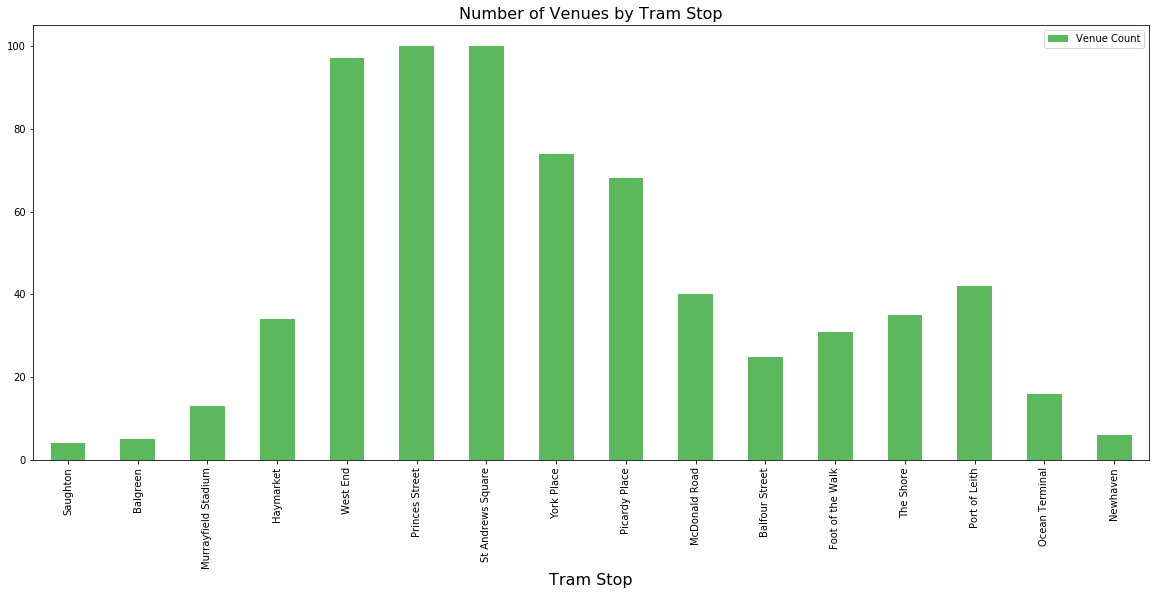

In [311]:
graph=TramStopsVenues_df1.drop(['Postcode', 'Status', 'intZoneName', 'Deprivation', 'Council Tax', 'PostcodeUK', 'Latitude', 'Longitude'],axis=1)
graph.set_index('TramStop',inplace=True)
ax=graph.plot(kind='bar',figsize=(20,8),color=['#5cb85c'])
ax.set_title('Number of Venues by Tram Stop', size=16)
ax.set_xlabel("Tram Stop Name", size = 16)

##  3.2 Analyse the venues

In [337]:
# one hot encoding
edinburgh_onehot = pd.get_dummies(edinburgh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
edinburgh_onehot['TramStop'] = edinburgh_venues['TramStop'] 

# move neighborhood column to the first column
fixed_columns = [edinburgh_onehot.columns[-1]] + list(edinburgh_onehot.columns[:-1])
edinburgh_onehot = edinburgh_onehot[fixed_columns]

edinburgh_onehot.head(5)

,TramStop,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Castle,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Curling Ice,Deli / Bodega,Department Store,Dive Bar,Electronics Store,Event Service,Event Space,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Fountain,French Restaurant,Garden,Gastropub,General College & University,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Juice Bar,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Monument / Landmark,Movie Theater,Museum,Neighborhood,Organic Grocery,Park,Pharmacy,Piano Bar,Pier,Pizza Place,Planetarium,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Record Shop,Restaurant,Rugby Stadium,Sandwich Place,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Skating Rink,Soccer Field,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Tour Provider,Track,Trail,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,Saughton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Saughton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Saughton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Saughton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Balgreen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [338]:
edinburgh_grouped = edinburgh_onehot.groupby('TramStop').mean().reset_index()
edinburgh_grouped

,TramStop,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Stop,Butcher,Café,Castle,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cupcake Shop,Curling Ice,Deli / Bodega,Department Store,Dive Bar,Electronics Store,Event Service,Event Space,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Fountain,French Restaurant,Garden,Gastropub,General College & University,General Entertainment,General Travel,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Juice Bar,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Monument / Landmark,Movie Theater,Museum,Neighborhood,Organic Grocery,Park,Pharmacy,Piano Bar,Pier,Pizza Place,Planetarium,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Record Shop,Restaurant,Rugby Stadium,Sandwich Place,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Skating Rink,Soccer Field,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Tour Provider,Track,Trail,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,Balfour Street,0.000000,0.00,0.000000,0.040000,0.00,0.000000,0.040000,0.080000,0.240000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.04,0.000,0.000000,0.040000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.040000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.0000,0.000000,0.00,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.040000,0.000000,0.080000,0.00,0.00,0.000000,0.000000,0.00,0.00000,0.00,0.00,0.000000,0.080000,0.000000,0.000000,0.0000,0.080000,0.000000,0.0,0.000000,0.000000,0.000000,0.040000,0.000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Balgreen,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.0000,0.000000,0.00,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.00000,0.00,0.00,0.000000,0.200000,0.000000,0.000000,0.0000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.20,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,Foot of the Walk,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.032258,0.000000,0.129032,0.032258,0.000000,0.000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.032258,0.096774,0.000000,0.000000,0.000000,0.00000,0.032258,0.000000

In [339]:
#put in pandas datframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [340]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['TramStop']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
edinburgh_venues_sorted = pd.DataFrame(columns=columns)
edinburgh_venues_sorted['TramStop'] = edinburgh_grouped['TramStop']

for ind in np.arange(edinburgh_grouped.shape[0]):
    edinburgh_venues_sorted.iloc[ind, 1:] = return_most_common_venues(edinburgh_grouped.iloc[ind, :], num_top_venues)

edinburgh_venues_sorted

,TramStop,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Balfour Street,Bar,Coffee Shop,Bakery,Italian Restaurant,Park
1,Balgreen,Grocery Store,Scenic Lookout,Playground,Tram Station,Park
2,Foot of the Walk,Bar,Coffee Shop,Hotel,Pub,Supermarket
3,Haymarket,Hotel,Café,Bar,Restaurant,Pizza Place
4,McDonald Road,Italian Restaurant,Grocery Store,Pub,Bakery,Bar
5,Murrayfield Stadium,Hotel,Clothing Store,Deli / Bodega,Soccer Field,Skating Rink
6,Newhaven,Café,Harbor / Marina,Climbing Gym,Supermarket,Food & Drink Shop
7,Ocean Terminal,Greek Restaurant,Spa,Movie Theater,Italian Restaurant,Bookstore
8,Picardy Place,Hotel,Bar,Café,Restaurant,Pub
9,Port of Leith,Café,Seafood Restaurant,Bar,Italian Restaurant,Hotel


In [341]:
# manually remove Soughton 5th place
edinburgh_venues_sorted.at[11,'5th Most Common Venue']=''
edinburgh_venues_sorted

,TramStop,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Balfour Street,Bar,Coffee Shop,Bakery,Italian Restaurant,Park
1,Balgreen,Grocery Store,Scenic Lookout,Playground,Tram Station,Park
2,Foot of the Walk,Bar,Coffee Shop,Hotel,Pub,Supermarket
3,Haymarket,Hotel,Café,Bar,Restaurant,Pizza Place
4,McDonald Road,Italian Restaurant,Grocery Store,Pub,Bakery,Bar
5,Murrayfield Stadium,Hotel,Clothing Store,Deli / Bodega,Soccer Field,Skating Rink
6,Newhaven,Café,Harbor / Marina,Climbing Gym,Supermarket,Food & Drink Shop
7,Ocean Terminal,Greek Restaurant,Spa,Movie Theater,Italian Restaurant,Bookstore
8,Picardy Place,Hotel,Bar,Café,Restaurant,Pub
9,Port of Leith,Café,Seafood Restaurant,Bar,Italian Restaurant,Hotel


# 3.3 Clustering

In [342]:
# set number of clusters
kclusters = 5

edinburgh_grouped_clustering = edinburgh_grouped.drop('TramStop', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(edinburgh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 0, 0, 0, 4, 2, 0, 0, 0], dtype=int32)

In [343]:
# add clustering labels
edinburgh_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

edinburgh_merged = TramStopsVenues_df1

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighbourhood 
edinburgh_merged = edinburgh_merged.join(edinburgh_venues_sorted.set_index('TramStop'), on='TramStop')

edinburgh_merged

,TramStop,Postcode,Status,intZoneName,Deprivation,Council Tax,PostcodeUK,Latitude,Longitude,Venue Count,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Saughton,EH11 3NE,Current,Stenhouse,973,1147.76,"EH11 3NE, UK",55.931544,-3.272888,4,1,Track,Golf Course,Tram Station,Fish & Chips Shop,
1,Balgreen,EH12 5XQ,Current,Balgreen and Roseburn,4962,2221.32,"EH12 5XQ, UK",55.938739,-3.252120,5,3,Grocery Store,Scenic Lookout,Playground,Tram Station,Park
2,Murrayfield Stadium,EH12 5PL,Current,Balgreen and Roseburn,5150,2669.63,"EH12 5PL, UK",55.943478,-3.236537,13,4,Hotel,Clothing Store,Deli / Bodega,Soccer Field,Skating Rink
3,Haymarket,EH12 5JZ,Current,"Dean, West End and West Coates",5897,1824.44,"EH12 5JZ, UK",55.946006,-3.219713,34,0,Hotel,Café,Bar,Restaurant,Pizza Place
4,West End,EH3 8ET,Current,Tollcross,4593,2286.55,"EH3 8ET, UK",55.947864,-3.211148,97,0,Bar,Sandwich Place,Italian Restaurant,Pub,Hotel
5,Princes Street,EH2 2ER,Current,Old Town and Leith Street,2964,3325.85,"EH2 2ER, UK",55.951939,-3.197979,100,0,Café,Bar,Pub,Coffee Shop,Sandwich Place
6,St Andrews Square,EH2 2AD,Current,Old Town and Leith Street,2964,0.00,"EH2 2AD, UK",55.954862,-3.191970,100,0,Hotel,Bar,Café,Coffee Shop,Pub
7,York Place,EH1 3JD,Current,Old Town and Leith Street,3197,3049.72,"EH1 3JD, UK",55.956361,-3.188381,74,0,Hotel,Bar,Pub,Café,Italian Restaurant
8,Picardy Place,EH1 3JT,Future,Old Town and Leith Street,3197,1569.38,"EH1 3JT, UK",55.956940,-3.187192,68,0,Hotel,Bar,Café,Restaurant,Pub
9,McDonald Road,EH7 4LX,Future,Broughton,5499,1703.09,"EH7 4LX, UK",55.961945,-3.181440,40,0,Italian Restaurant,Grocery Store,Pub,Bakery,Bar


In [348]:
# create map
map_clusters = folium.Map(location=[latitudeEDI, longitudeEDI], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(edinburgh_merged['Latitude'], edinburgh_merged['Longitude'], edinburgh_merged['TramStop'], edinburgh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters